Importing necessary libraries

In [368]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

Loading and reading the dataset

In [369]:
df = pd.read_csv("Titanic-Dataset.csv")

In [370]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [371]:
df.shape

(891, 12)

In [372]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


Data Cleaning

In [373]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Data Cleaning - Imputation

In [374]:
df['Cabin'] = df['Cabin'].replace(np.nan,df['Cabin'].mode()[0])
df['Embarked'] = df['Embarked'].replace(np.nan,df['Embarked'].mode()[0])

In [375]:
df['Age'] = df['Age'].replace(np.nan,-1)

Visualisation and Learning from the dataset

In [376]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [377]:
# Create 'AgeGroup'
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, np.inf], labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior'])

# Create 'FareBin'
df['FareBin'] = pd.qcut(df['Fare'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Extract 'Title' from 'Name'
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Replace rare titles with a common one
df['Title'] = df['Title'].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

display(df[['AgeGroup', 'FareBin', 'Title']].head())

<>:8: SyntaxWarning: invalid escape sequence '\.'
<>:8: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-571016167.py:8: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


,AgeGroup,FareBin,Title
0,Young Adult,Low,Mr
1,Adult,Very High,Mrs
2,Young Adult,Medium,Miss
3,Young Adult,Very High,Mrs
4,Young Adult,Medium,Mr


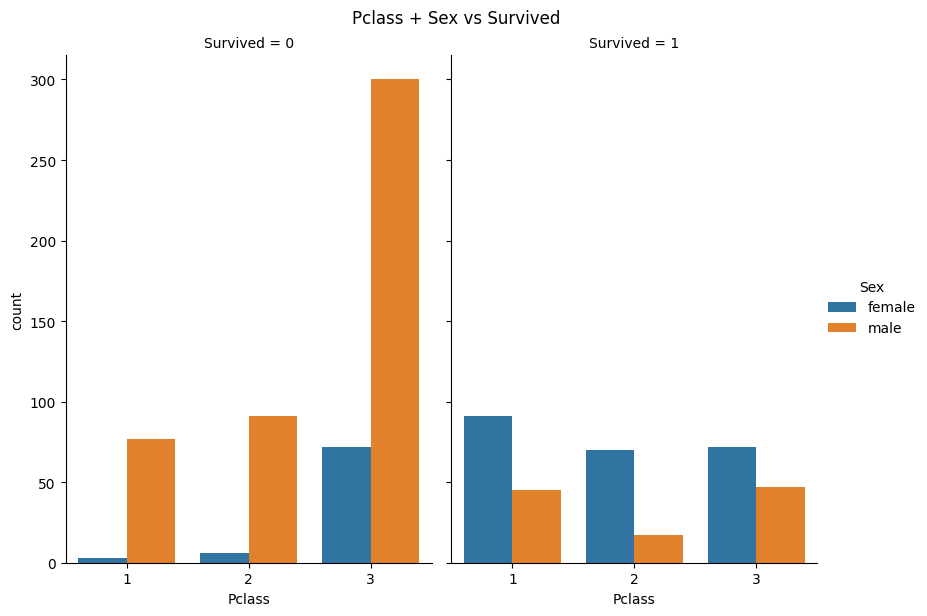

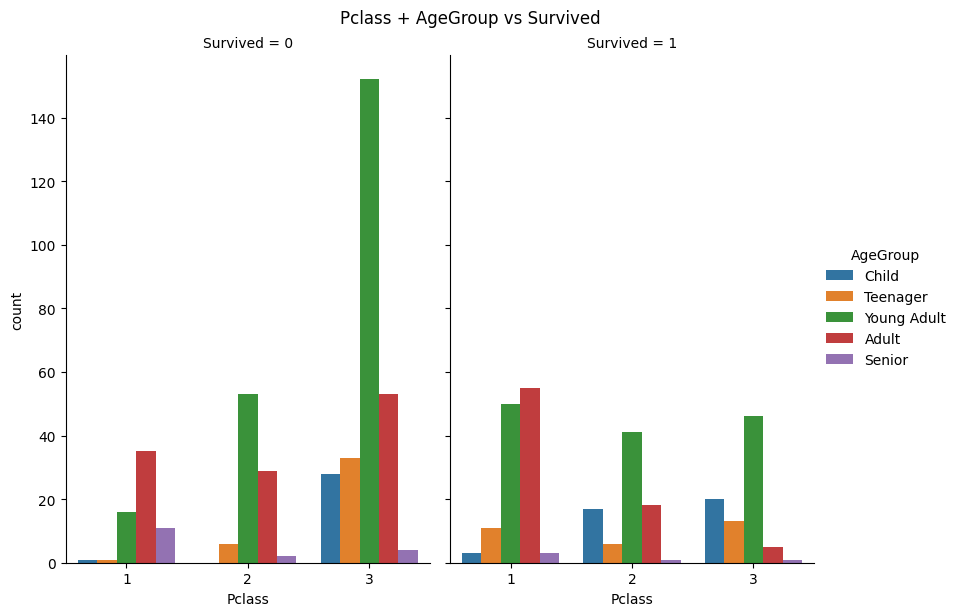

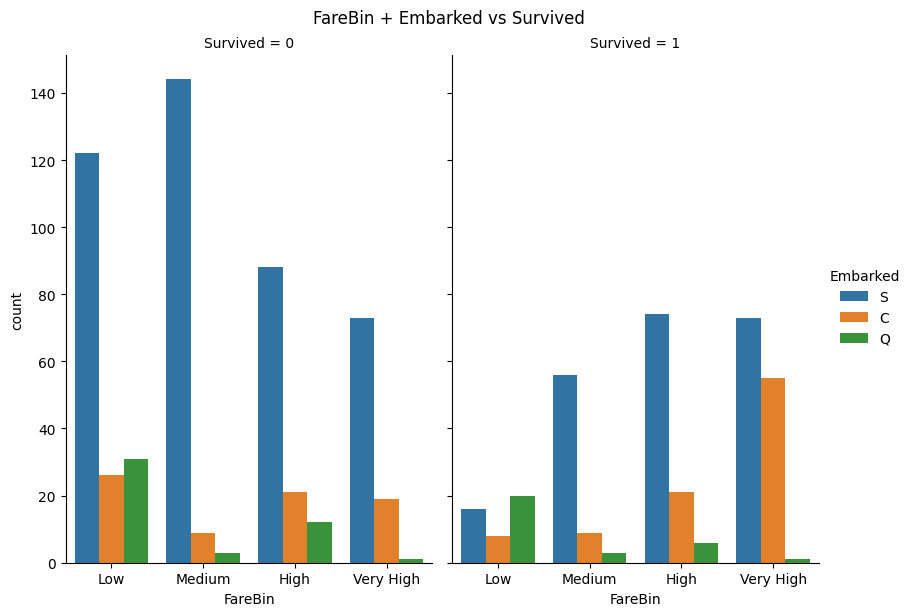

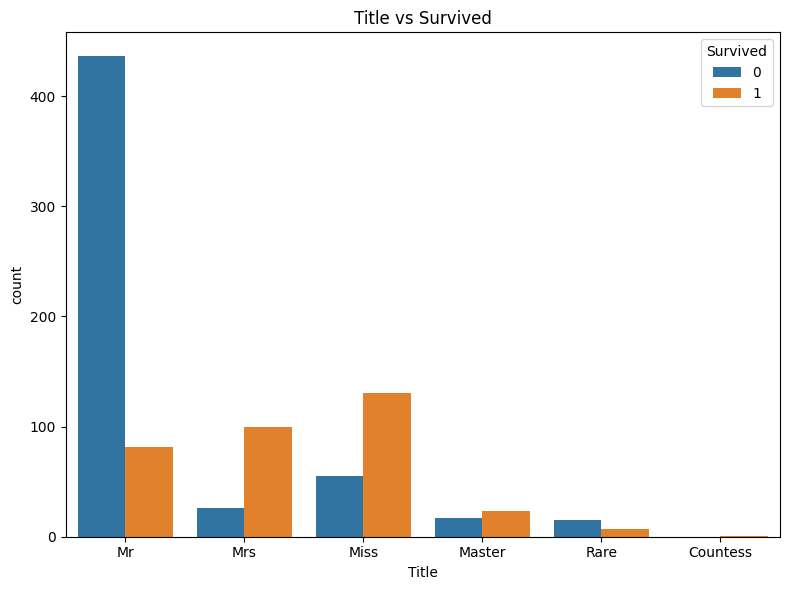

In [378]:
# Pclass + Sex vs Survived
sns.catplot(data=df, x='Pclass', hue='Sex', col='Survived', kind='count', height=6, aspect=.7)
plt.suptitle('Pclass + Sex vs Survived', y=1.02) # Add a suptitle for the catplot
plt.show()

# Pclass + AgeGroup vs Survived
sns.catplot(data=df, x='Pclass', hue='AgeGroup', col='Survived', kind='count', height=6, aspect=.7)
plt.suptitle('Pclass + AgeGroup vs Survived', y=1.02) # Add a suptitle for the catplot
plt.show()

# FareBin + Embarked vs Survived
sns.catplot(data=df, x='FareBin', hue='Embarked', col='Survived', kind='count', height=6, aspect=.7)
plt.suptitle('FareBin + Embarked vs Survived', y=1.02) # Add a suptitle for the catplot
plt.show()

# Title (from Name) vs Survived
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.countplot(data=df, x='Title', hue='Survived', ax=ax)
ax.set_title('Title vs Survived')
plt.tight_layout()
plt.show()

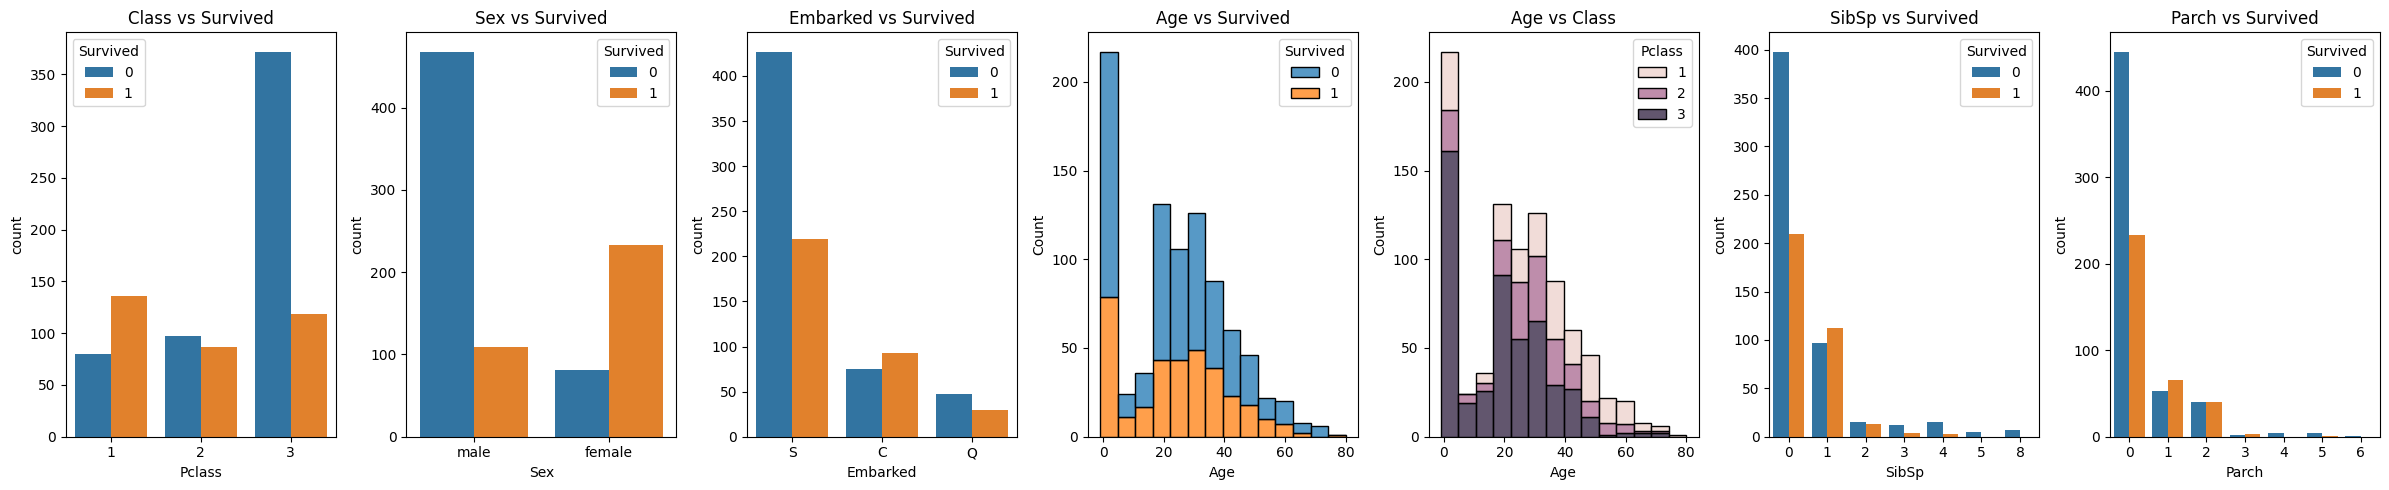

In [379]:
fig, axes = plt.subplots(1, 7, figsize=(24, 5))  # Increased to 7 columns for new plots

sns.countplot(data=df, x='Pclass', hue='Survived', ax=axes[0])
axes[0].set_title('Class vs Survived')

sns.countplot(data=df, x='Sex', hue='Survived', ax=axes[1])
axes[1].set_title('Sex vs Survived')

sns.countplot(data=df, x='Embarked', hue='Survived', ax=axes[2])
axes[2].set_title('Embarked vs Survived')

sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', ax=axes[3])
axes[3].set_title('Age vs Survived')

sns.histplot(data=df, x='Age', hue='Pclass', multiple='stack', ax=axes[4])
axes[4].set_title('Age vs Class')

# Add plots for SibSp and Parch vs Survived
sns.countplot(data=df, x='SibSp', hue='Survived', ax=axes[5])
axes[5].set_title('SibSp vs Survived')

sns.countplot(data=df, x='Parch', hue='Survived', ax=axes[6])
axes[6].set_title('Parch vs Survived')


plt.tight_layout()
plt.show()

Data Cleaning - Encoding

In [380]:
cat = df.select_dtypes(include='object')
num = df.select_dtypes(exclude='object')

In [381]:
df_encoded = pd.get_dummies(df, columns=['Sex', 'Cabin', 'Embarked', 'AgeGroup', 'FareBin', 'Title'])

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,...,FareBin_Low,FareBin_Medium,FareBin_High,FareBin_Very High,Title_Countess,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,False,...,True,False,False,False,False,False,False,True,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,True,...,False,False,False,True,False,False,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,True,...,False,True,False,False,False,False,True,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,True,...,False,False,False,True,False,False,False,False,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,False,...,False,True,False,False,False,False,False,True,False,False


In [382]:
df.shape

(891, 15)

Data Cleaning - Normalisation and Standardisation

In [385]:
df_encoded_numeric = df_encoded.select_dtypes(include=np.number)

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_encoded_numeric)